In [1]:
%reload_ext autoreload
%autoreload 2

### Genetic algorithm (float)

### 1D

Populating the interactive namespace from numpy and matplotlib


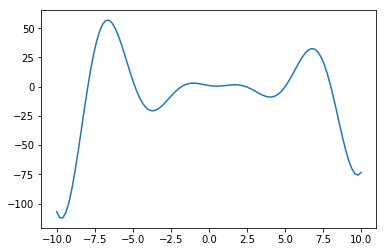

[array([-6.41376402]), array([ 6.87094172]), array([ 6.97601656]), array([ 6.99224137])]


In [2]:
%pylab inline
import numpy as np
from Electromagnetics.EvolAlgs import GAFloatArr, GAFloatArrIndividual

def f(x):
    return (x-1)**2*np.cos(x) + x*np.sin(x)
x0, x1 = -10.0, 10.0
x = np.linspace(x0, x1, 100)
plot(x, f(x))
show()


class funcOptimizer1D(GAFloatArrIndividual):
    
    def Evaluate(self, params):
        x = self.x[0]
        fx = f(x)
        self.fx = np.array([fx])
        

ga = GAFloatArr(popsize=4)
indiv_params = {"range":[[x0, x1]], "n_obj":1}
ga.InitRandom(individualType=funcOptimizer1D, indiv_params=indiv_params)
alg_params = {"n_gen":15, "minmax":"max", "sel-method":"best-fit-all", "sd":0.3}
pop = ga.Run(alg_params)

opts = [pop[i].x for i in range(len(pop))]
print(opts)


### 2D

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


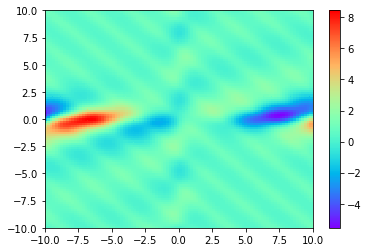

1/20 2/20 3/20 4/20 5/20 6/20 7/20 8/20 9/20 10/20 11/20 12/20 13/20 14/20 15/20 16/20 17/20 18/20 19/20 20/20 [(array([-8.43561956, -0.32148773]), array([ 7.11001792])), (array([ 10.        ,  -0.43786263]), array([ 5.73997846])), (array([ 9.78890023, -0.73258279]), array([ 5.02316196])), (array([-10.        ,  -1.18766052]), array([ 4.33649346])), (array([-10.        ,  -1.30079313]), array([ 4.27320252])), (array([-10.        ,  -1.31240321]), array([ 4.26378674])), (array([-10.        ,  -1.39792268]), array([ 4.18117066])), (array([ 9.82602085, -1.17654706]), array([ 3.75079567])), (array([-10.        ,  -1.73636821]), array([ 3.71964676])), (array([-7.89063762, -1.43574923]), array([ 3.70924343]))]
7.11001791593


In [6]:
%pylab inline
import numpy as np
from Electromagnetics.EvolAlgs import GAFloatArr, GAFloatArrIndividual, gaOptimizer

def f(x, y):
    return (x+y-1)/(1+y**2)*np.cos(x/2-y) + np.sin(x-y)/(1+x**2) + np.exp(-(np.sin(x+y)**2))
x0, x1 = -10.0, 10.0
y0, y1 = -10.0, 10.0
x = np.linspace(x0, x1, 100)
y = np.linspace(y0, y1, 100)
X, Y = np.meshgrid(x, y, indexing='ij')
pcolormesh(X, Y, f(X, Y), cmap="rainbow")
colorbar()
show()


f_eval = lambda x: f(x[0], x[1])       

opts = gaOptimizer(f_eval, intervals=[[x0, x1], [y0, y1]], pop_size=10, n_gen=20, mu_sd=0.2, 
        maximize=True, vbose=False, parallel=False, x_0=None)
print(opts)

print(f_eval(opts[0][0]))
